<a href="https://colab.research.google.com/github/sgr1118/PyTorch/blob/main/Chapter11_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 11.1 하이퍼파라미터란?
- 모델의 성능에 영향을 끼치지만 자동으로 최적화되지 않는 파라미터

- 하이퍼파라미터 튜닝은 보통 모델의 학습이 종료되고 성능을 평가한 이후에나 가능하다. 데이터셋과 모델이 커질수록 이런 튜닝과정은 점점 힘들어진다. 따라서 중요한 하이퍼파라미터가 무엇인지 구분하는 능력이 중요하다.

## 11.2 팁: 효율적인 연구/개발 진행 방법

### 1. 천 리길도 한 걸음부터
- 연구에 있어 베이스라인 구축이 중요하다. 최신 논문 적용도 좋지만 한정된 시간과 내가 해소하려는 문제에서 무조건 좋은 결과를 준다는 보장이 없다. 그렇기 때문에 베이스라인을 구축하여 문제를 점차 해소한다.

### 2. 하이퍼파라미터에 따른 결과물 정리
- 체계적으로 실험 결과를 저장해야할 필요가 있다.

- 교재 예시 : model.n_layers-10.n_epochs.act-leaky_relu.loss-xxx.accuracy-xx.pth

### 3. 파이프라인 구축
- ML 업무 진행 프로세스는 다음돠 같다

- 문제 정의 : 단계를 나누고 simplify, x와 y를 정의
- 데이터 수집 : 문제 정의에 따른 수집, 필요에 따라 레이블링
- 데이터 전처리 및 분석 : 형태를 가공, 필요에 따라 EDA 수행
- 알고리즘 적용 : 가설을 세우고 구현/적용
- 평가 : 실험 설계, 테스트셋 구성
- 배포 : RESTful API를 통한 배포, 상황에 따라 유지/보수

- 반복되는 작업을 자동화하기 위하여 파이프라인 구축이 필요하지만 너무 정형화하려면 배보다 배꼽이 더 큰 상황이 발생한다.

- 이런 워크플로우를 도와주는 도구가 많다. 대표적으로 에어플로우, 쿠배플로우

## 11.3 적응형 학습률

- 학습률은 너무 크면 학습이 안정적이지 않고 너무 작으면 학습이 오래걸린다. 가장 먼저 튜닝이 필요한 파라미터이기도 하다.

### 1. 학습률의 크게에 따른 특징과 동적 학습률의 필요성

- $\theta < \theta - \boldsymbol{\eta} \bigtriangledown {}_{\theta}\mathcal{L}(\theta)$

- 기존 경사하강법 공식에서는 드래디언트를 뺄 때 학습률을 곱하여 파라미터가 변하는 양을 조절할 수 있었다.

- 다음 그림을 참고해보자. 학습률이 클 때와 작을 때 학습 진행 양상이다. 학습률을 학습 중간에 어느 정도 조정이 가능하다. 학습률 감쇠 비율(learing ratio decay ratio)을 사용하면 된다. 보통 0.5 또는 0.1의 값을 활용한다.

![](https://velog.velcdn.com/images%2Fssulee0206%2Fpost%2F0d8e83cb-6c3e-4f48-a29e-e59b22860fa6%2F2.png)
<center></center>

- 학습률을 정적인 아닌 동적으로 사용하면 이점이 있다. 더 나아가 필요한 학습률을 자동으로 찾아서 적용하는 방법을 사용한다면 더욱 편할 것이다. 이런 방법을 적응형 학습률이라고 한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-11/03-adaptive_lr_lineage.png)
<center>적응형 학습률의 계보</center>

- 계보에보면 다양한 적응형 학습형 알고리즘이 있다. 이중 가장 많이 쓰이는 것은 아담이다. 다음은 아담의 기반이 되는 기초 알고리즘을 확인한다.

### 2. 모멘텀
- 모멘텀은 시작부터 매번 계산된 그래디언트를 누적하는 형태로 구현된다. 다음 그림을 보면서 이해해보도록한다. (교재 298p도 참고)

![](https://blog.kakaocdn.net/dn/VoyUL/btrvwjbAX4j/hH5fKfDWT0xjwY7i1VQMG1/img.png)
<center>모멘텀</center>

- 우리는 전역 최소점을 찾으려 한다. 이 점에 도달하기 위해 학습률이 진동하는 방향을 서로 상쇄시키고 오른쪽으로 나아가는 방향은 계속 누적되어 커지게한다.

### 3. 적응형 학습률
- 모멘텀은 여전히 학습률을 정해주어야하는 단점이 있다. 이런 부분을 보완하고자 학습률에 대한 고민을 하지 않고 상황에 따라 학습률이 자동으로 정해지는 형태가 더 좋을것이다. 이것을 적응형 학습률(adaptive learning rate)라고 한다.

학습률 스케줄링
- 데이터 셋과 모델 구조 그리고 손실 함수에 따라 손실 표면의 모양이 바뀌게 된다. 따라서 매번 다른 문제를 풀 때 달라지는 최적의 학습률을 찾기 위해 튜닝이 필요하다.

- 다음과 같은 학습률 스케줄링 기법이 있다.
- 초기 학습률을 가지고 모델 최적화를 수행
- 일정 에포크 또는 이터레이션이 경과한 후에 감쇠를 시작, 또는 에포크에서 모델의 학습이 더 이상 진전되지 않을 때 감쇠를 시작
- 학습률 감괴는 선형적으로 적용될 수도 있으며 비율이 곱해지는 형태로 적용되거나 코사인 함수의 형태로 적용될 수도 있다.

- 이 경우에는 학습 내에서 동적으로 학습률을 가져갈 수 있지만 오히려 학습률과 연관된 하이퍼파라미터가 추가되는 단점도 있다.

아다그래드 옵티마이저(AdaGrad)
- 각 가중치 파라미터의 학습률은 가중치 파라미터가 업데이트될수록 반비례하여 작아지게 되는 적응형 학습률이다. 업데이트가 많이 된 파라미터의 경우 작은 학습률을 갖고 적게 된 파라미터의 경우 큰 학습률을 갖게 된다.

- 학습이 진행됨에 따라 파라미터 업데이트가 많이 될 경우 학습률이 너무 작아져 나중에는 그래디언트가 크더라도 가중치 파라미터 업데이트가 잘 이루어지지 않을 수도 있다.

아담 옵티마이저(Adam optimizer)
- 아담은 아다그래드 이후 가장 널리쓰이는 방법이다. 기존 적응형 학습률 방식에 모템이 추가된 알고리즘으로 기존 방법들을 보완함으로서 가장 보편적으로 쓰인다.

- 아담을 사용하면 기본 설정값을 가지고도 대부분의 문제에서 좋은 성능을 얻을 수 있다. 즉 모델이나 학습 방법이 학습률에 강인(robust)해지는 효과가 있다.

## 11.4 적응형 학습률의 수식

- $\mathcal{L_{\theta}} = \frac{1}{N} \sum{i=1}^N \boldsymbol{\Delta} (f(x_{i}:\theta_{t}), y_{i})$

- $g_{t} = \bigtriangledown {}_{\theta} \mathcal{L}(\theta_{t})$ 

- 손실 함수는 데이터셋의 샘플들에 대해 타깃 출력값과 함수의 출력값 사이의 차이를 계산한다. 이걸 가중치 파라미터에 대해서 미분하면 그래디언트 벡터 $g_t$를 얻는다.

- $\theta_{t+1} = \theta_t - \boldsymbol{\eta} \cdot g_{t}$

- 앞서 구한 그래디언트 학습률을 곱해 기준 파라미터에서 빼 준 결과를 다음 파라미터로 정한다. 여기에서 t는 파라미터 업데이트 횟수이다.

### 1. 모멘텀의 수식
- '관성'이라는 의미를 지닌 만큼 예전 그래디언트를 누적해서 계산

- $\tilde{g_{t}} = - \boldsymbol{\eta} \cdot \sum_{i=1}^{t} \boldsymbol{\gamma}^{t-i} \cdot g_{i}$

- $ where \tilde{g_{0}} = 0 and \boldsymbol{\gamma} is discountfactor$

- 이 수식을 통해 처음부터 현재까지의 디스카운트가 곱해진 그래디언트의 누적 합이 된다. 그러고 나면 다음 가중치 파라미터를 업데이트하기 위해 현재 가중치 파라미터에 모멘텀 그래디언트를 더해주게 된다. 결국 모든 타임스텝의 그래디언트를 누적하여 빼주는 형태로 수식이 정리된 것을 볼 수 있다.

- $\theta_{t+1} = \theta_{t} - \boldsymbol{\gamma} \cdot \sum_{i=1}^t \boldsymbol{\gamma}^{t-i} \cdot g_{i}$

### 2. 아다그래드의 수식
- 다음 수식과 같이 그래디언트의 제곱을 누적한 값을 계산하여 활용한다.
- $\boldsymbol{\gamma}_{t} = \sum_{i=1}^{t} g_{i} \bigodot g_{i}$

- $\theta_{t+1} = \theta_{t} - \boldsymbol{\gamma} \cdot \frac{g_t}{\sqrt{\varepsilon \sum_{i=1}^t \boldsymbol{\gamma}^{t-i} \cdot g_{i}}} $
- $\boldsymbol{\gamma}_{t}$는 t 까지의 그래디언트의 제곱 값을 누적한 값이다.
- 누적값과 그래디언트는 같은 크기를 지닌 벡터 또는 행렬이 될 것이디 때문에 $\boldsymbol{\gamma}_{t}$가 각 가중치 파라미터 학습률이 되는 것을 알 수 있다.
- 이로 인하여 그동안 업데이트의 크기가 큰 가중치 파라미터 요소는 작은 학습률이 곱해질 것이다.

- 이처럼 적응형 학습률을 사용하게 되면 학습 초기에는 큰 학습률과 학습 후기에는 작은 학습률을 가질 수 있게 된다.

### 3. 아담의 수식
- $\rho_1 = 0.9 and \rho-2 = 0.999$

- $s_t = (1 - \rho_1) \cdot \sum_{i=1}^t \rho_{1}^{t-i} \cdot g_{i}$
- 기존 모멘텀에는 현재 그래디언트에 학습률이 바로 곱해지지만 여기서는 $1 - \rho_1$가 대신 곱해진다.
- 그래디언트가 누적된 모멘텀의 텀을 $s_{t}$라고 하겠다. 여기에 적응형 학습률은 다음 수식으로 정리하고 $\boldsymbol{\gamma}_{t}$라고 부른다

- $\boldsymbol{\gamma}_{t} = (1 - \rho_2) \cdot \sum_{i=1}^t \rho_{2}^{t-i} \cdot (g_{i} \bigodot g_{i})$

- 이 수식이 기존의 아다그래드와 가장 큰 차이점은 디스카운트 파라미터의 존재 유무이다. %\rho_{2}%가 반복적으로 곱해지면서 학습 후반에 그랜디언트 제곱 누적 값이 커지는 것을 방지한다.다음 수식과 같이 모템텀과 적응형 학습률를 재정의 하게된다.

- $\hat{s_{t}} = \frac{s_t}{1 - \rho_{1}^t}$, $\hat{\gamma_{t}} = \frac{\gamma_{t}}{1 - \rho_{2}^t}$

- 이렇게 재정의된 수식을 전체 경사하강법 수식에 넣어 전개한다.
- $\theta_{t+1} 
= \theta - \boldsymbol{\gamma} \cdot \frac{\sqrt{1-\rho_2^t}}{1-\rho_1^t} \cdot \frac{1-\rho_1}{\sqrt{1-\rho_2}} \cdot \frac{\sum_{i=1}^t\rho_1^t-i \cdot g_i}{\sqrt{\sum_{i=1}^t\rho_2^t-i \cdot (g_i \bigodot g_i)}}$

- 이 수식을 나눠서 설명하면 다음과 같다.

- $\frac{1-\rho_1}{\sqrt{1-\rho_2}}$ : 하이퍼파라미터로만 구성되어 있고 맨 앞의 학습률 파라미터와 함께 상수로 취급
- $\sum_{i=1}^t\rho_1^t-i \cdot g_i$ : 모멘텀
- $\sqrt{\sum_{i=1}^t\rho_2^t-i \cdot (g_i \bigodot g_i)}$ : 적응형 학습률에 대응되는 부분
- $\frac{\sqrt{1-\rho_2^t}}{1-\rho_1^t}$ : 학습이 진행되며 t가 증가함에 따라 다음과 같은 값이 된다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-11/04-adam_eq.png)
<center>편향 수정이 되는 과정</center>


## 11.5 아담 옵티마이저 적용하기

In [1]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 셋 불러오기

from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

#print(cancer.DESCR)

# 보스턴 데이터 df

df = pd.DataFrame(california.data, columns = california.feature_names)
df['TARGET'] = california.target

In [2]:
# 최적화를 위한 표준 스케일링 수행

scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, : -1] = scaler.transform(df.values[:, :-1])

### 2. 학습 코드 구현

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy 데이터를 파이토치 실수형 텐서로 변환

data = torch.from_numpy(df.values).float()

# 입력 x와 출력 y로 나눈기

x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

# 학습에 필요한 설정값을 정한다.

n_epochs = 4000
batch_size = 256
learning_late = 1e-2
print_interval = 200

torch.Size([20640, 8]) torch.Size([20640, 1])


- DNN을 nn.Sequential로 정의한다.

In [4]:
# nn.Sequential

model = nn.Sequential(
    nn.Linear(x.size(-1), 6), # 첫 번째 선형 계층의 크기 8
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)) # 마지막 선형 계층의 크기 1
)

print(model)

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)


ADAM 옵티마이저 클래스 생성 시 lr은 입력이 가능하다.

CLASS torch.optim.Adam(params, lr = 0.001, betas = (0.9, 0.999), eps = 1e-0.8, weight_decay = 0, amsgrad = False)

In [5]:
# optimizer 선언
# 별도로 학습률은 넣어주지 않는다.

optimizer = optim.Adam(model.parameters())

In [6]:
# 학습 수행

for i in range(n_epochs):
    # Shuffle the index to feed-forward
    indices = torch.randperm(x.size(0))
    x_ = torch.index_select(x, dim = 0, index = indices)
    y_ = torch.index_select(y, dim = 0, index = indices)

    x_ = x_.split(batch_size, dim = 0)
    y_ = y_.split(batch_size, dim = 0)

    y_hat = []
    total_loss = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        total_loss += float(loss) # 메모리 부족을 방지하기 위하여 중요한 부분이다.
        y_hat += [y_hat_i]

    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, total_loss))

y_hat = torch.cat(y_hat, dim = 0)
y = torch.cat(y_, dim = 0)

# 아담을 사용한 덕에 좀 더 낮은 손실값을 보여준다.

Epoch 200: loss=2.6974e+01
Epoch 400: loss=2.5160e+01
Epoch 600: loss=2.5074e+01
Epoch 800: loss=2.4983e+01
Epoch 1000: loss=2.4830e+01
Epoch 1200: loss=2.4767e+01
Epoch 1400: loss=2.4692e+01
Epoch 1600: loss=2.4633e+01
Epoch 1800: loss=2.4547e+01
Epoch 2000: loss=2.4444e+01
Epoch 2200: loss=2.4407e+01
Epoch 2400: loss=2.4327e+01
Epoch 2600: loss=2.4329e+01
Epoch 2800: loss=2.4365e+01
Epoch 3000: loss=2.4265e+01
Epoch 3200: loss=2.4309e+01
Epoch 3400: loss=2.4269e+01
Epoch 3600: loss=2.4244e+01
Epoch 3800: loss=2.4218e+01
Epoch 4000: loss=2.4237e+01


### 3. 결과 확인
- 분류 문제이므로 분류 예측 결과에 대한 정확도 평가가 가능하다

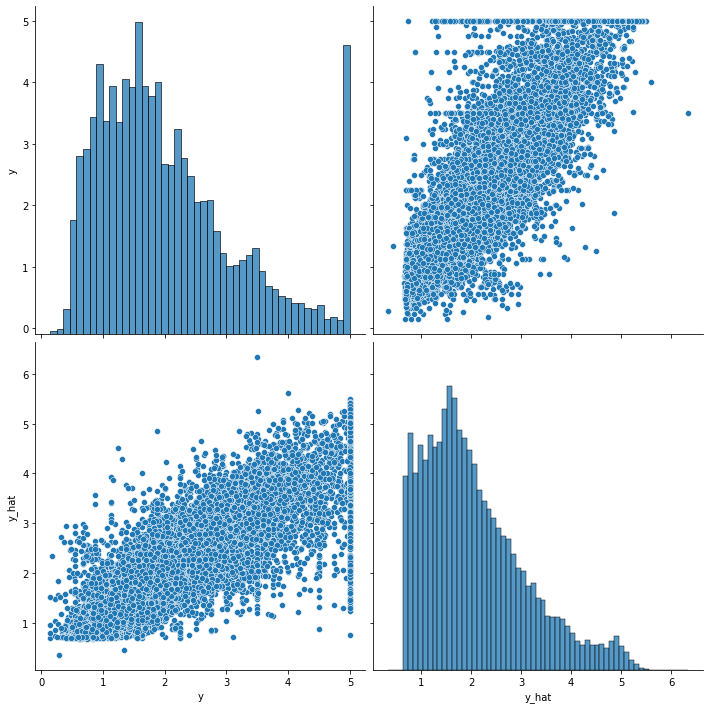

In [7]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])

sns.pairplot(df, height = 5)
plt.show()

# 실제 값과 유사한 분포를 보여주고있다.

## 10.5 마치며

### 요약

1. 하이퍼 파라미터
 - 하이퍼 파라미터란 모델의 성능에 영향을 주지만 자동으로 학습되지 않는 파라미터이고 학습률, 신경망의 넓이/깊이, 활성함수의 종류 등이있다.

2. 적응형 학습률
 - 학습률의 설정에 따라 모델의 학습 경향이 매우 달라질 수 있다.
 - 학습 초반에는 큰 학습률이 선호되고 후반에는 작은 학습률이 선호된다.
 - 이것을 응용하여 각 가중치 파라미터별 학습 진행 정도에 따라 학습률을 다르게 적용 할 수 있다.

3. Adam 최적화 방법
 - 가장 널리 쓰이는 방법이고 모멘텀과 적응형 학습률이 복합 적용된 방식이다.